<a href="https://colab.research.google.com/github/Zahira11/Movie-Recommendation-System-/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[1.1 Install Libraries ]**

In [4]:
 !pip3 install pandas 

In [6]:
!pip3 install matplotlib 

In [7]:
!pip3 install numpy 

In [8]:
!pip3 install scikit-surprise

     |████████████████████████████████| 11.8MB 9.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670911 sha256=f5b9177714dcc3040e88a58aa642463a2f32e3226e10e18490dfc63251561260
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


**1.2: Importing Libraries**
First of all, we will need to import some libraries. This includes surprise which we will use to create the recommendation system.

In [9]:
print('>> Importing Libraries')

import pandas as pd

from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

print('>> Libraries imported.')

>> Importing Libraries
>> Libraries imported.


**Task 2: Importing Data**

We will use open-source dataset from GroupLens Research (movielens.org)


**2.1: Importing the Data**

The dataset is saved in a ratings.csv file. We will use pandas to take a look at some of the rows.


In [16]:
df =  pd.read_csv('/content/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**2.2 Dropping timestamp**

We won't be using the timestamp when user gave the particular rating. So we will drop that column.


In [17]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


**2.3 Check for Missing Data**

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.


In [18]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

**Task 3: EDA (Exploratory data analysis)**

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics.


**3.1 Number of movies/users**


In [20]:
n_movies = df['movieId'].nunique()
n_users = df['userId'].nunique()
print(f'Number of Unique Movies: {n_movies}')
print(f'Number of unique Users: {n_users}')

Number of Unique Movies: 9724
Number of unique Users: 610


**3.2 Sparsity of our data**

Sparsity (%) = (No of missing values/ (Total Values))X100


In [21]:
available_rating = df['rating'].count()
total_rating = n_movies*n_users
missing_rating = total_rating - available_rating
sparsity =  (missing_rating/total_rating)*100
print(f'sparsity: {sparsity}')

sparsity: 98.30003169443864


**3.3 Ratings Distribution**

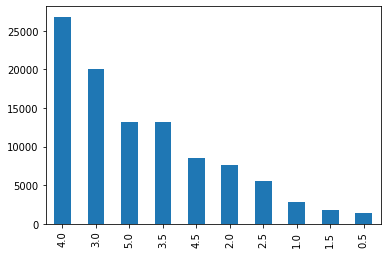

In [23]:
df['rating'].value_counts().plot(kind= 'bar')

**Task 4: Dimensionality Reduction**

To reduce the dimensionality of the dataset, we will filter out rarely rated movies and rarely rating users

**4.1 Filter movies with less than 3 ratings**


In [24]:
filter_movies = df['movieId'].value_counts()>3
filter_movies = filter_movies[filter_movies].index.tolist()

**4.2 Filter users with less than 3 movies rated**


In [26]:
filter_users = df['userId'].value_counts()>3
filter_users = filter_users[filter_users].index.tolist()

**4.3 Remove rarely rated movies and rarely rating users**


In [29]:
print(f'Original Shape of dataset: {df.shape}')
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print(f'New shape of dataset: {df.shape}')

Original Shape of dataset: (100836, 3)
New shape of dataset: (92394, 3)


**Task 5: Create Training and Test Sets**


**5.1 Columns used for training**

In [34]:
cols = ['userId', 'movieId', 'rating']

**5.2 Create surprise dataset**


In [36]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[cols], reader)

**5.3 Create Train-set and Prediction-set**

In [37]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

**Task 6: Creating and training the model**


**6.1 Creating the model**

SVD (Singular Value Decomposition)

Interaction Matrix = A X B X C

In [38]:
algo = SVD(n_epochs=25, verbose=True)

**6.2 Training the model**


**Mean Absolute Error (MAE)**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.


**Root mean squared error (RMSE)**: RMSE is the square root of the average of squared differences between prediction and actual observation.


In [39]:
cross_validate(algo, data, measures=['RMSE','MAE'], verbose=True)
print(">>Train the Model")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

In [40]:
cross_validate(algo, data, measures=['RMSE','MAE'],cv=5, verbose=True)
print(">>Train the Model")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

**Task 7: Predictions**


7.1 Predict ratings for all pairs (user, items) that are NOT in the training set.

In [41]:
predictions = algo.test(antiset)

In [42]:
predictions[0]

Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

**7.2 Recommending top 3 movies movies based on predictions**

In [45]:
from collections import defaultdict
def get_top_n(predictions, n):
  top_n = defaultdict(list)
  for uid, iid, _, est, _ in predictions:
    top_n[uid].append((iid,est))

  for uid, user_rating in top_n.items():
    user_rating.sort(key = lambda x: x[1], reverse=True)
    top_n[uid] = user_rating[:n]

  return top_n
  pass

top_n = get_top_n(predictions, n=3)
for uid, user_rating in top_n.items():
  print(uid, [iid for (iid,rating)in user_rating] )

1 [318, 48516, 109487]
2 [1276, 51255, 1223]
3 [2324, 593, 1237]
4 [1221, 1247, 5618]
5 [7153, 1267, 1208]
6 [951, 2160, 68954]
7 [912, 527, 1199]
8 [1204, 1225, 928]
9 [858, 1136, 1193]
10 [908, 1952, 106642]
11 [922, 1041, 2160]
12 [260, 1196, 1197]
13 [318, 912, 589]
14 [1237, 71899, 5690]
15 [1208, 1204, 1387]
16 [922, 1258, 3435]
17 [951, 1262, 928]
18 [1262, 1197, 1225]
19 [4973, 296, 1208]
20 [475, 91529, 593]
21 [318, 1204, 951]
22 [923, 2762, 2019]
23 [1261, 2160, 1104]
24 [5618, 3275, 1196]
25 [296, 608, 1089]
26 [2959, 3275, 1223]
27 [56782, 1237, 5690]
28 [1262, 1237, 1252]
29 [2329, 2959, 4973]
30 [1208, 2329, 48516]
31 [56782, 168252, 1204]
32 [2959, 858, 2858]
33 [1261, 7361, 930]
34 [168252, 912, 66934]
35 [4993, 858, 750]
36 [260, 4973, 1206]
37 [3275, 48516, 2324]
38 [928, 1276, 306]
39 [3451, 1261, 3275]
40 [1201, 2959, 56782]
41 [318, 1204, 1376]
42 [778, 910, 142488]
43 [6, 50, 101]
44 [858, 306, 951]
45 [1237, 2160, 4226]
46 [56782, 1262, 933]
47 [951, 58559, 720]